In [ ]:
# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the data
tokenized_training_data = tokenizer(train_data["interaction"], return_tensors="pt", padding=True, truncation=True, max_length=20)

tokenized_test_data = tokenizer(test_data["interaction"], return_tensors="pt", padding=True, truncation=True, max_length=20)

print(tokenized_training_data)

In [ ]:
# Complete the function
def tokenize_function(data):
    return tokenizer(data["interaction"],
                     return_tensors="pt",
                     padding=True,
                     truncation=True,
                     max_length=64)

tokenized_in_batches = train_data.map(tokenize_function,batched=True)

In [ ]:
# Complete the function
def tokenize_function(data):
    return tokenizer(data["interaction"],
                     return_tensors="pt",
                     padding=True,
                     truncation=True,
                     max_length=64)

# Tokenize row by row
tokenized_by_row = train_data.map(tokenize_function,batched=False)

print(tokenized_by_row)

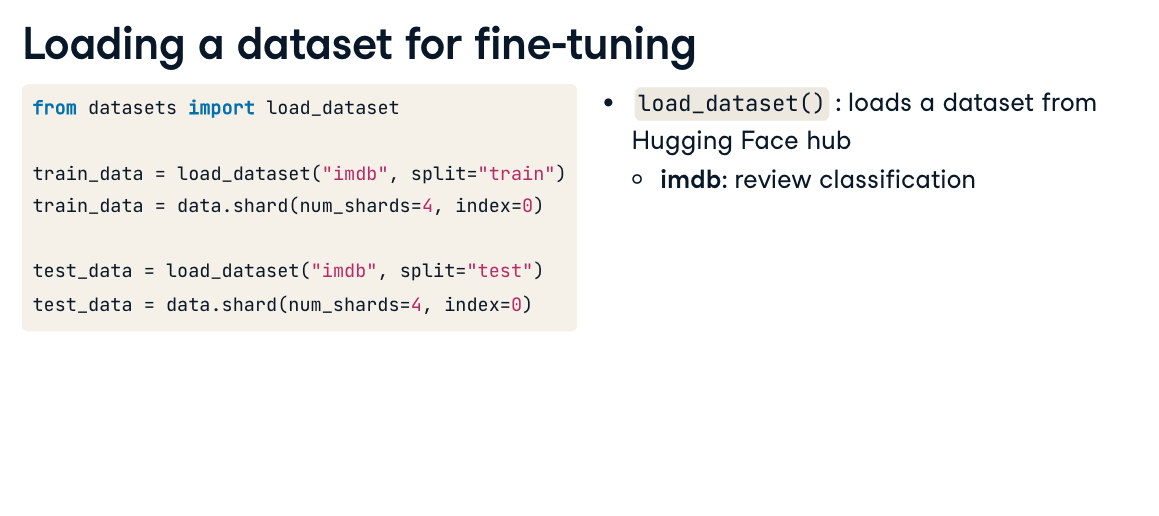

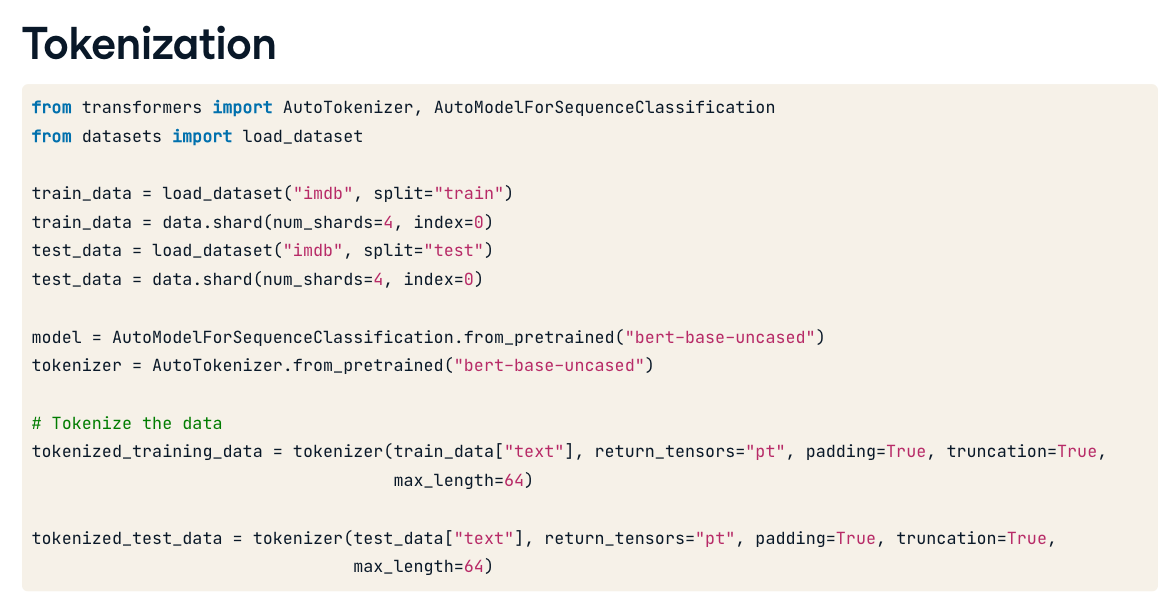

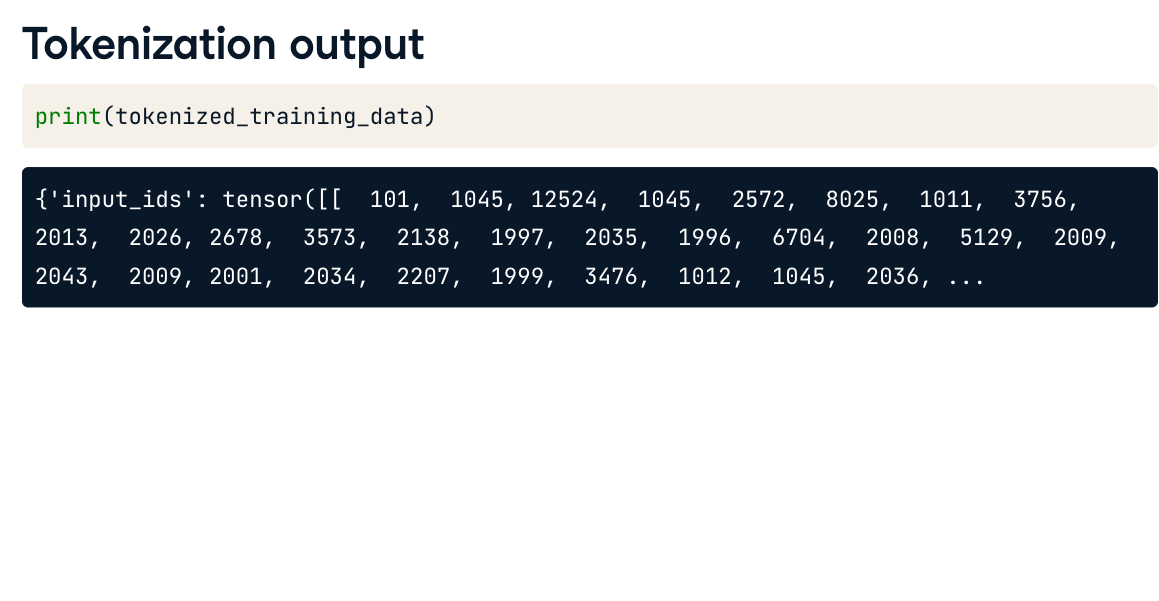

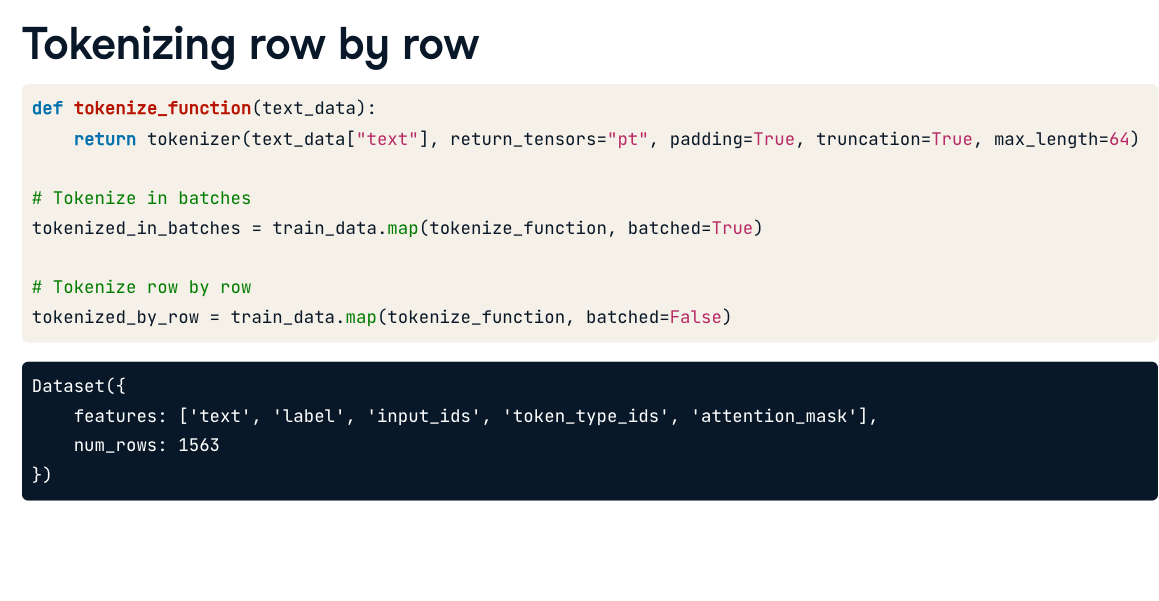

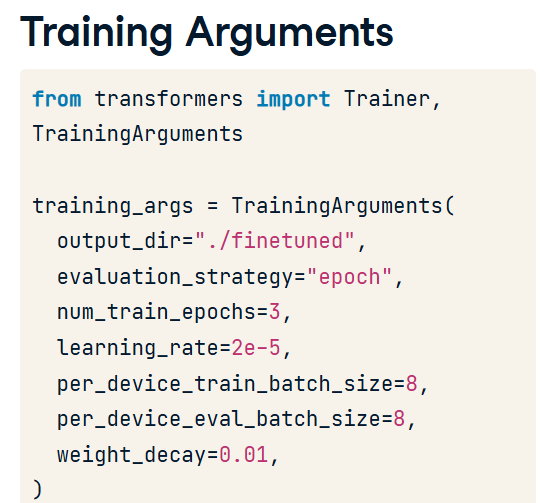

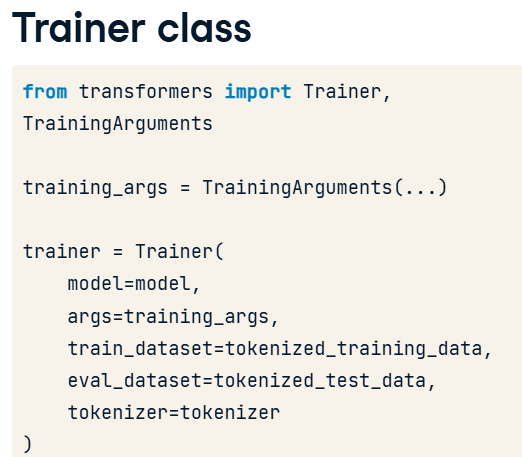

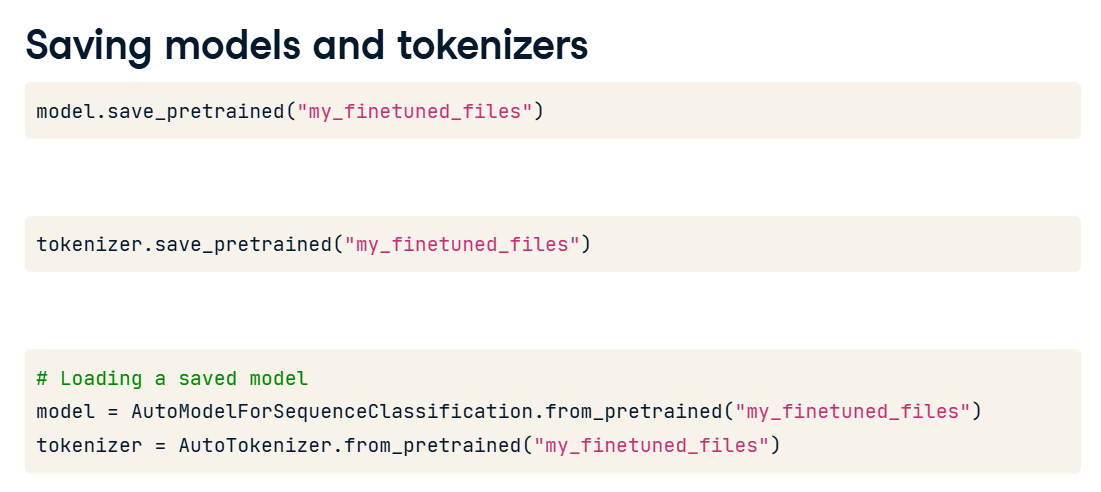

In [ ]:
# Set up an instance of TrainingArguments
training_args = TrainingArguments(
  output_dir="./finetuned",
  # Set the evaluation strategy
  evaluation_strategy="epoch",
  # Specify the number of epochs
  num_train_epochs=3,
  learning_rate=2e-5,
  # Set the batch sizes
  per_device_train_batch_size=3,
  per_device_eval_batch_size=3,
  weight_decay=0.01
)

In [ ]:
# Set up the trainer object
trainer = Trainer(
    model=model,
    # Assign the training arguments and tokenizer
    args=training_args,
    train_dataset=tokenized_training_data,
    eval_dataset=tokenized_test_data,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

In [ ]:
input_text = ["I'd just like to say, I love the product! Thank you!"]

# Tokenize the new data
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# Pass the tokenized inputs through the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract the new predictions
predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()

label_map = {0: "Low risk", 1: "High risk"}
for i, predicted_label in enumerate(predicted_labels):
    churn_label = label_map[predicted_label]
    print(f"\n Input Text {i + 1}: {input_text[i]}")
    print(f"Predicted Label: {predicted_label}")

In [ ]:
# Include an example in the input ext
input_text = """
Text: "The dinner we had was great and the service too."
Classify the sentiment of this sentence as either positive or negative.
Example:
Text: "The food was delicious"
Sentiment: Positive
Text: "The dinner we had was great and the service too."
Sentiment:
"""

# Apply the example to the model
result = model(input_text, max_length=100)

print(result[0]["label"])